In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import set_printoptions

from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from collections import Counter

In [3]:
#!pip install tensorflow==2.14.0
!pip install keras
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [3]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [2]:
from tensorflow import keras
from keras.layers import Dense, Dropout, Layer
from keras.optimizers import Adam
from keras.models import Sequential
from keras_tuner.tuners import RandomSearch
from scikeras.wrappers import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded= files.upload()

Saving forestfires.csv to forestfires.csv


In [4]:
forestfire= pd.read_csv("forestfires.csv")
forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
pd.set_option("display.max_columns", 31)
forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [6]:
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
forestfire.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
forestfire[forestfire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [9]:
numerical_feature=[feature for feature in forestfire.columns if forestfire[feature].dtypes !='O']
print("Total Numerical columns:",len(numerical_feature))
forestfire[numerical_feature].head()

Total Numerical columns: 28


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [10]:
cat_feature=[var for var in forestfire.columns if forestfire[var].dtypes =='O']
print("Total Numerical columns:",len(cat_feature))
forestfire[cat_feature].head()

Total Numerical columns: 3


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


([<matplotlib.patches.Wedge at 0x7f4a1aba7cd0>,
 [Text(-0.7303966113145594, 0.8225088389678306, 'small'),
  Text(0.8631959951899341, -0.9720559005983449, 'large')],
 [Text(-0.39839815162612324, 0.44864118489154386, '73.11%'),
  Text(0.5311975355014978, -0.5981882465220584, '26.89%')])

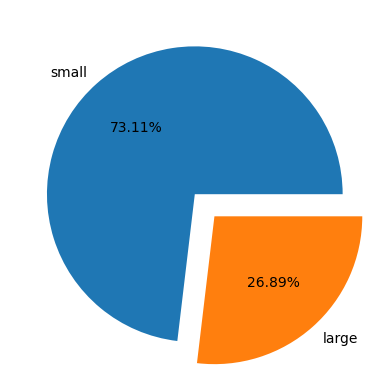

In [11]:
plt.pie(forestfire.iloc[:,-1].value_counts(),labels=forestfire['size_category'].unique(),autopct='%1.2f%%',explode=(0,0.2))

In [12]:
barplot=forestfire.groupby(['size_category','month']).size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False)
barplot

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


In [13]:
barplot_d=forestfire.groupby(['size_category','day']).size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False)
barplot_d

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


<Axes: xlabel='day', ylabel='count'>

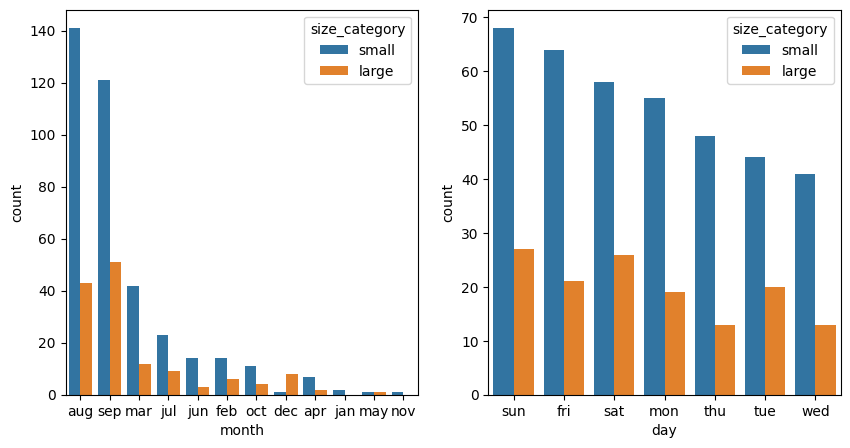

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x='month',y='count',hue='size_category',data=barplot,ax=axes[0])
sns.barplot(x='day',y='count',hue='size_category',data=barplot_d,ax=axes[1])

In [15]:
le= LabelEncoder()
forestfire['size_category']= le.fit_transform(forestfire['size_category'])
forestfire['size_category']

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [16]:
plot_rain=forestfire.groupby(['size_category','rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False)
plot_rain

,size_category,rain,count
2,1,0.0,371
0,0,0.0,138
3,1,0.2,2
5,1,0.8,2
1,0,6.4,1
4,1,0.4,1
6,1,1.0,1
7,1,1.4,1


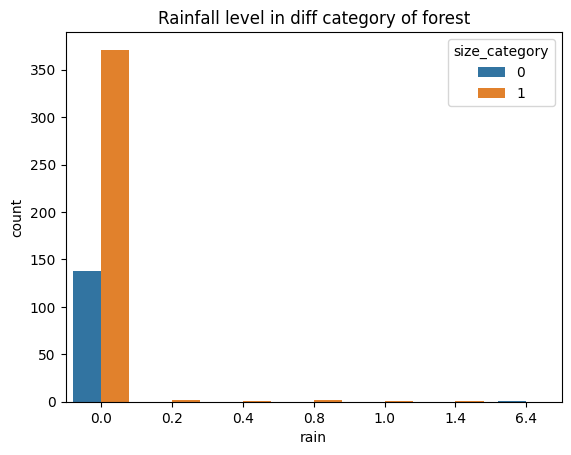

<Axes: title={'center': 'Rainfall level in diff category of forest'}, xlabel='rain', ylabel='count'>

In [17]:
rain=sns.barplot(x='rain',y='count',hue='size_category',data=plot_rain)
plt.title("Rainfall level in diff category of forest")
plt.show()
rain

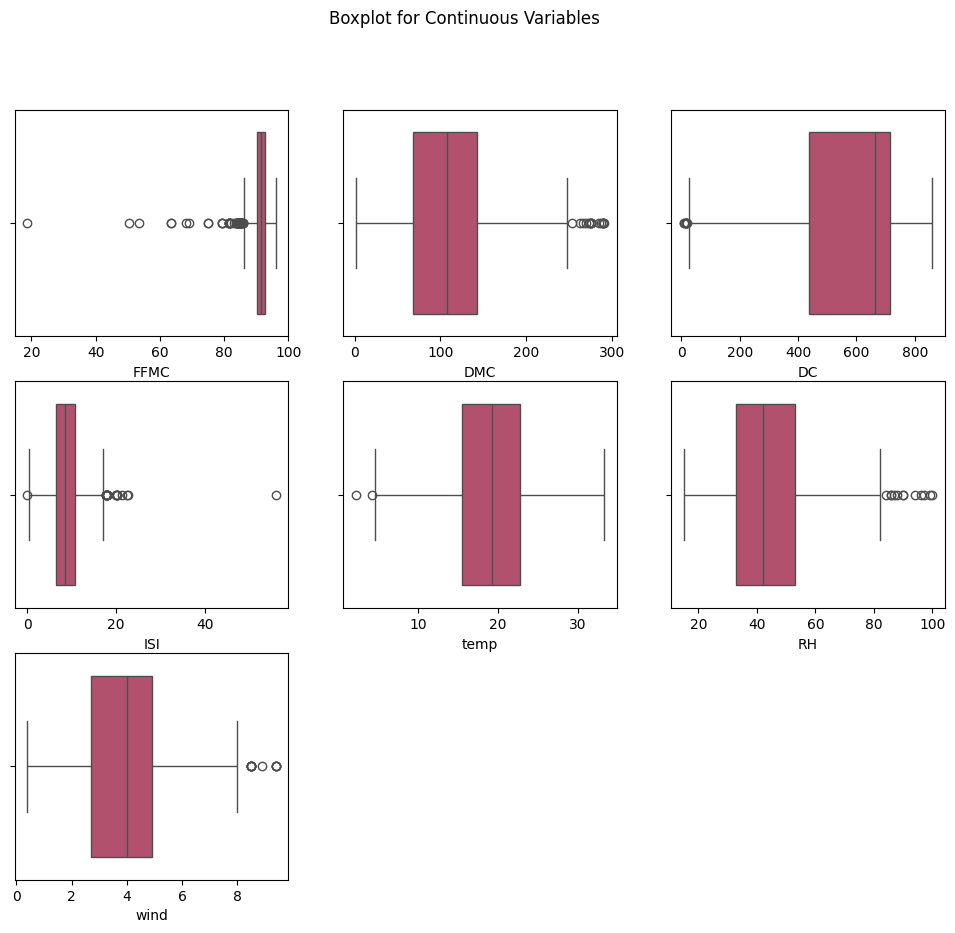

In [18]:
col=["FFMC","DMC","DC","ISI","temp","RH","wind"]
plt.figure(figsize=(12,10))
plt.suptitle("Boxplot for Continuous Variables")
for i,j in enumerate(col,start=1):
  plt.subplot(3,3,i)
  sns.boxplot(forestfire[j],palette='flare',orient='h')
  plt.tight_layout
plt.show()

In [19]:
forestfire.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [20]:
forestfire1=forestfire.drop(['month', 'day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],axis=1)
forestfire1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [21]:
corr=forestfire1.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.311322
size_category,-0.022063,-0.034715,-0.019428,0.008726,-0.006021,0.045243,-0.059113,-0.050001,-0.311322,1.000000


<Axes: >

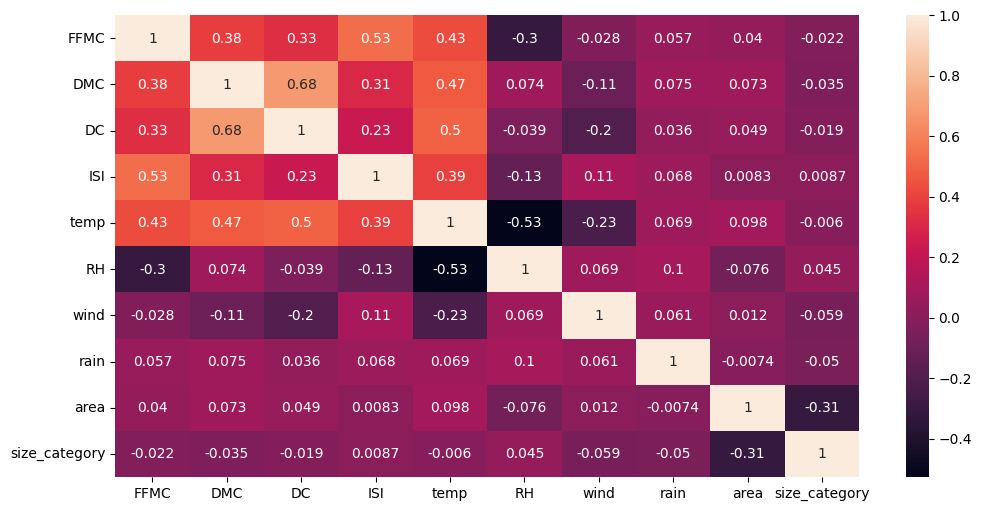

In [22]:
fig= plt.figure(figsize=(12, 6))
sns.heatmap(corr,annot=True)

In [23]:
corr1= pd.DataFrame(corr.iloc[:,-1])
corr1

,size_category
FFMC,-0.022063
DMC,-0.034715
DC,-0.019428
ISI,0.008726
temp,-0.006021
RH,0.045243
wind,-0.059113
rain,-0.050001
area,-0.311322
size_category,1.000000


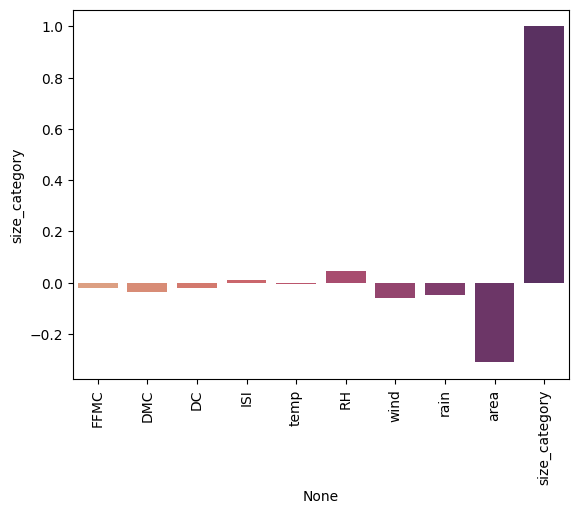

<Figure size 1200x600 with 0 Axes>

In [24]:
plt.xticks(fontsize=10,rotation=90)
sns.barplot(x=corr1.index,y=corr1['size_category'],palette='flare')
plt.figure(figsize=(12,6))
plt.show()

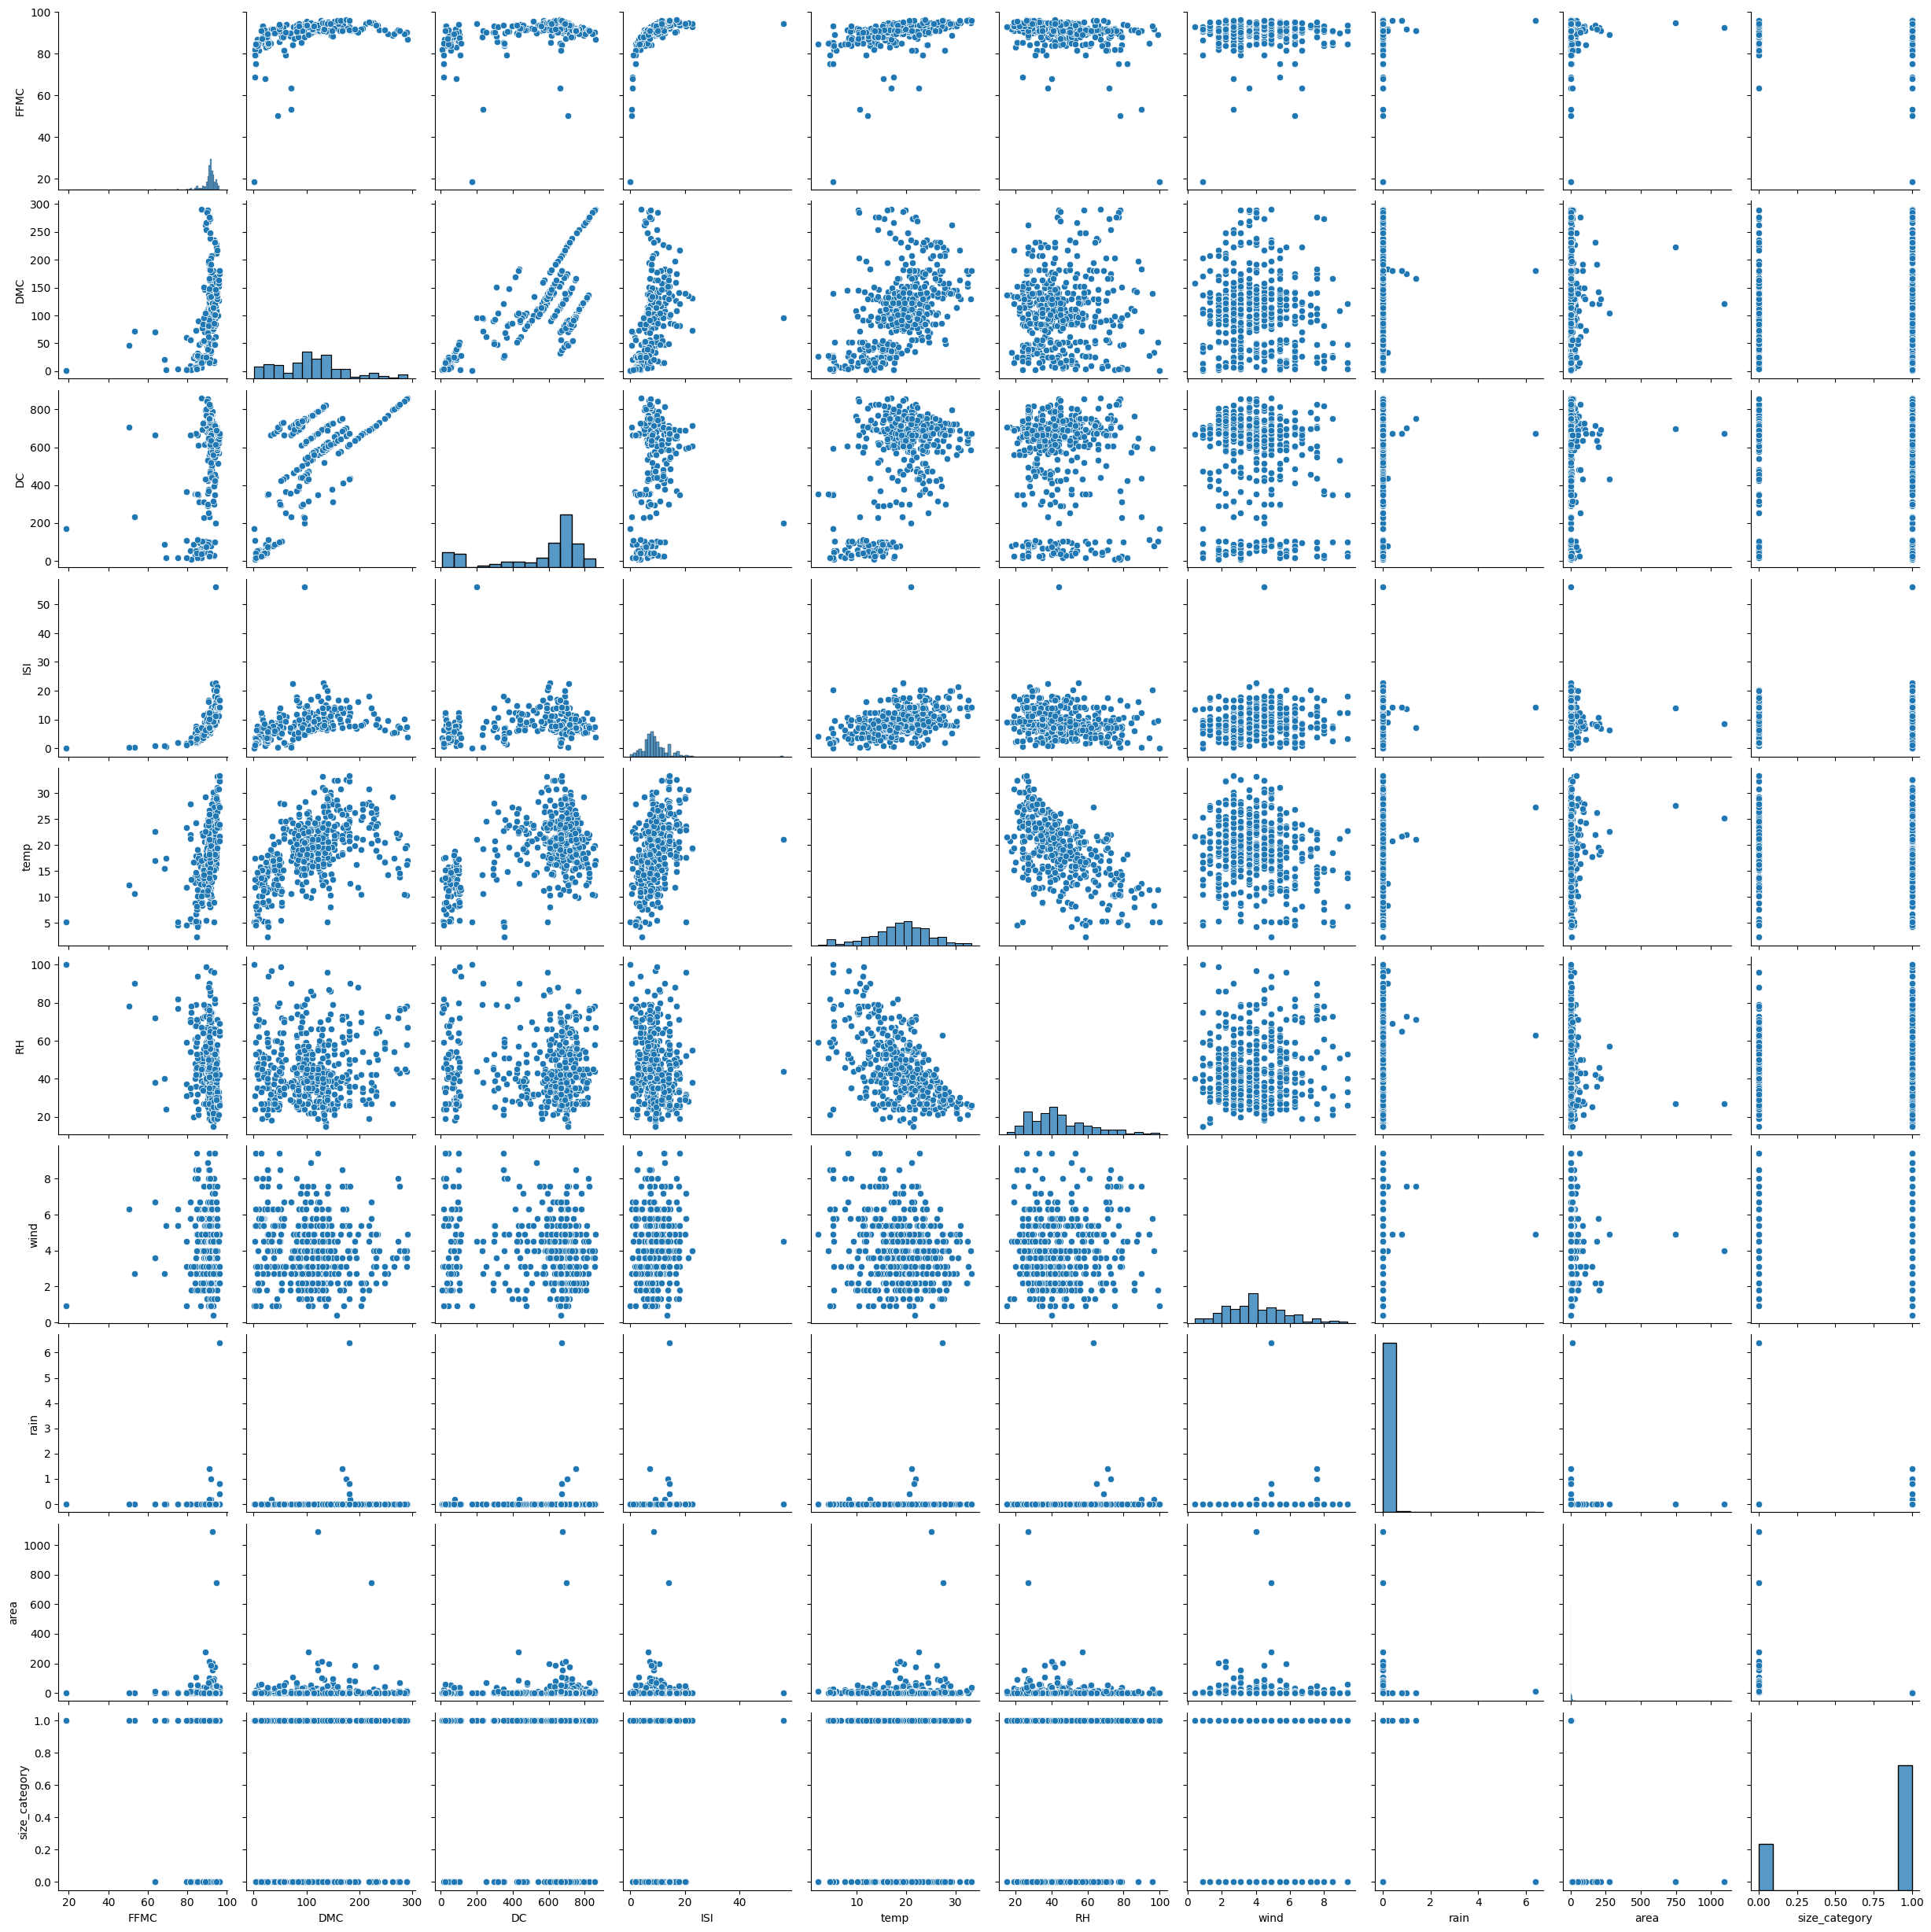

In [25]:
sns.pairplot(forestfire1)

**Data** **Preprocessing**

In [26]:
forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [27]:
forestfire.drop(['month','day','daymon','monthjan'],axis=1,inplace= True)

In [28]:
pd.set_option("display.max_columns", 27)
forestfire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [29]:
forestfire.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category      int64
dtype: object

In [30]:
from sklearn.ensemble import IsolationForest
forest_fire=forestfire.copy()

clf= IsolationForest(random_state=42,contamination=0.01)
clf.fit(forest_fire)
forest_fire['anamoly']=clf.predict(forest_fire.iloc[:,0:27])
outliers= forest_fire[forest_fire['anamoly']==-1]
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,...,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
274,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,-1
280,84.7,26.7,352.6,4.1,2.2,59,4.9,0.0,9.27,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,-1
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,-1
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
465,79.5,3.6,15.3,1.8,4.6,59,0.9,0.0,6.84,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,-1


In [31]:
x = forestfire.drop('size_category', axis=1)
y = forestfire['size_category']

In [32]:
std= StandardScaler()
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)
x_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,2.254407,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,-0.443576,-0.440449,-0.474467,-0.365748,2.660475,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,-0.443576,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,2.254407,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,-0.443576,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081


In [37]:
x_train,x_test,y_train,y_test= train_test_split(x_std,y,test_size=0.25)

In [38]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((387, 26), (130, 26), (387,), (130,))

**Building Model**

In [46]:
def create_model(build_fn=None):
  model= Sequential()
  model.add(Dense(12,input_dim=26,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam = Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [47]:
model= KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40]
epochs=[10,50,100]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid= GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result= grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.910 total time=   3.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.936 total time=   2.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.805 total time=   1.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.909 total time=   1.9s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.870 total time=   1.9s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=0.949 total time=   5.9s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................
[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.923 total time=   4.7s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................
[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.844 total time=   5.5s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................
[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.857 total time=   4.3s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................
[CV 5/5; 2/9] END .....batch

In [49]:
print('Best : {},using ; {}'.format(grid_result.best_score_,grid_result.best_params_))
means= grid_result.cv_results_["mean_test_score"]
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with: {}'.format(mean,stdev,param))

Best : 0.9249417249417249,using ; {'batch_size': 20, 'epochs': 50}
0.8861138861138862,0.045590773868571736 with: {'batch_size': 10, 'epochs': 10}
0.8834498834498834,0.04384136242098548 with: {'batch_size': 10, 'epochs': 50}
0.9041958041958041,0.035736940404804414 with: {'batch_size': 10, 'epochs': 100}
0.855078255078255,0.043432435711010464 with: {'batch_size': 20, 'epochs': 10}
0.9249417249417249,0.02406797773587397 with: {'batch_size': 20, 'epochs': 50}
0.9249084249084248,0.027976388350818775 with: {'batch_size': 20, 'epochs': 100}
0.7723276723276724,0.07846844605590134 with: {'batch_size': 40, 'epochs': 10}
0.9145188145188146,0.03568290857789843 with: {'batch_size': 40, 'epochs': 50}
0.9093906093906095,0.03606939341271187 with: {'batch_size': 40, 'epochs': 100}


In [56]:
#get best value for learning rate and dropuout by hyperparameter tuning
def create_model(learning_rate=0.001,dropout_rate=0.0):
  model= Sequential()
  model.add(Dense(12,input_dim=26,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,input_dim = 8,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='sigmoid'))
  adam = Adam(learning_rate)
  model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
  return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50,dropout_rate=0.0,learning_rate=0.001)
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.936 total time=  11.4s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.910 total time=   4.2s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.818 total time=   4.3s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.857 total time=   4.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.883 total time=   4.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [57]:
print('Best : {},using ; {}'.format(grid_result.best_score_,grid_result.best_params_))
means= grid_result.cv_results_["mean_test_score"]
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with: {}'.format(mean,stdev,param))

Best : 0.9171495171495172,using ; {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.880919080919081,0.04096193768877395 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9093573093573093,0.03514590959853917 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8344988344988344,0.050152547689559755 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.868098568098568,0.03805487243843007 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9119214119214119,0.038209230770707404 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8085914085914085,0.06977970927318902 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.862937062937063,0.042338134308132186 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9171495171495172,0.028241608840789217 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7440226440226441,0.05083417780455078 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [61]:
#get best value for kernel initializer and activation func by hyperparameter tuning
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 26,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50,activation_function='softmax',init='uniform')

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

param_grids = dict(activation_function = activation_function,init = init)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.949 total time=   5.3s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.885 total time=   4.2s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.844 total time=   4.1s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.818 total time=   4.8s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.909 total time=   4.1s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [62]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9534798534798534, using {'activation_function': 'tanh', 'init': 'uniform'}
0.880952380952381,0.046241745656883916 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.9016650016650016,0.02943421570528493 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8964701964701964,0.029952708947416584 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9172161172161172,0.024305465962839733 with: {'activation_function': 'relu', 'init': 'uniform'}
0.93003663003663,0.03262832355751568 with: {'activation_function': 'relu', 'init': 'normal'}
0.7207459207459207,0.03272808861535453 with: {'activation_function': 'relu', 'init': 'zero'}
0.9534798534798534,0.010401983803218794 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9456543456543456,0.026574511514769535 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7207459207459207,0.03272808861535453 with: {'activation_function': 'tanh', 'init': 'zero'}
0.937895437895438,0.02780622570165902 with: {'activat

In [64]:
#get best value for neuron by hyperparameter tuning

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 26,kernel_initializer = 'normal',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50,neuron1=4,neuron2=2)

neuron1 = [4,8,16]
neuron2 = [2,4,8]
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.974 total time=   5.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.974 total time=   4.1s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.961 total time=   4.8s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.909 total time=   4.3s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.948 total time=   4.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [65]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9585414585414587, using {'neuron1': 8, 'neuron2': 4}
0.9533799533799534,0.024202504521678426 with: {'neuron1': 4, 'neuron2': 2}
0.9455877455877456,0.0343733776870561 with: {'neuron1': 4, 'neuron2': 4}
0.9534132534132533,0.013408133424004409 with: {'neuron1': 4, 'neuron2': 8}
0.9404262404262405,0.031522733890392673 with: {'neuron1': 8, 'neuron2': 2}
0.9585414585414587,0.020875163801620637 with: {'neuron1': 8, 'neuron2': 4}
0.9534132534132533,0.01774001259796 with: {'neuron1': 8, 'neuron2': 8}
0.9197802197802197,0.03803126228397338 with: {'neuron1': 16, 'neuron2': 2}
0.9430569430569429,0.017774857824771072 with: {'neuron1': 16, 'neuron2': 4}
0.9481851481851482,0.026074457678233846 with: {'neuron1': 16, 'neuron2': 8}


In [66]:
def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 26,kernel_initializer = 'normal',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'normal',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50)

model.fit(x_train,y_train)

y_predict = model.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test,y_predict))

Test Accuracy: 0.9615384615384616


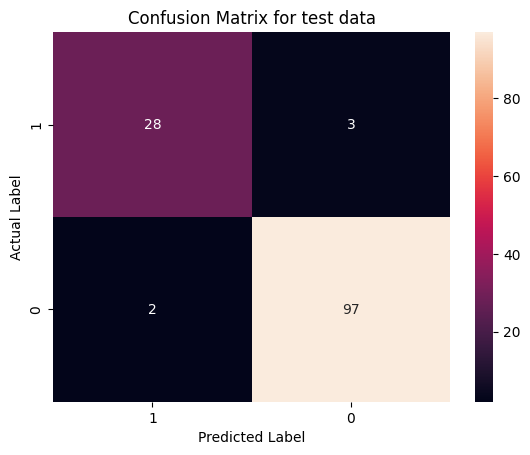

In [67]:
cm_df=confusion_matrix(y_test, y_predict)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [68]:
y_hat = model.predict(x_train)
print("Train Accuracy:", accuracy_score(y_train, y_hat))

Train Accuracy: 0.9844961240310077
